# Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load cleaned data
df = pd.read_csv('./data/listing_primary.csv')

In [3]:
df.head()

,accommodates,bedrooms,beds,bathrooms,rating,neighbourhood,room_type,bath_type,price
0,1,1.0,1.0,1.0,4.60,Wallingford,Entire home/apt,standard,99.0
1,2,1.0,1.0,3.0,4.72,Georgetown,Private room,shared,67.0
2,4,2.0,3.0,1.0,4.97,Fairmount Park,Entire home/apt,standard,184.0
3,3,2.0,2.0,1.0,4.99,Fairmount Park,Entire home/apt,standard,155.0
4,4,2.0,2.0,1.0,4.80,Fairmount Park,Entire home/apt,standard,228.0


## Data distribution

In [4]:
num_cols = ['accommodates', 'bedrooms', 'beds', 'bathrooms', 'rating', 'price']
cat_cols = ['neighbourhood', 'room_type', 'bath_type']

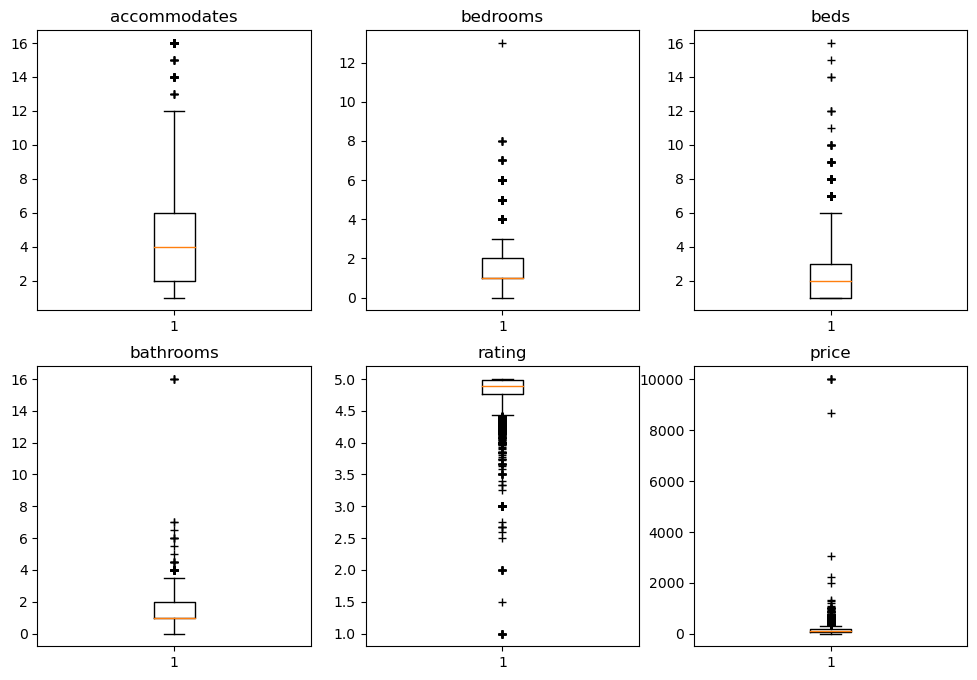

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for n in range(0, len(num_cols)):
    i, j = n//3, n%3
    axs[i, j].boxplot(df[num_cols[n]], sym='+')
    axs[i, j].set_title(num_cols[n])

* Interestingly, we observe some outliers in feature `price`: a few of rooms seem have incredibly high rental price.
* Further analysis showed that the upper quartile of `price` is `$187`, while the max price is `$10000`. Notably, only 6 rooms had price higher than `$4000`. Therefore, we identify rooms with price higher than `$4000` as outliers and removed them for model training.
* After removing the outliers, the highest price of rooms is `$3071`. However, it's reasonable because the house is prepared for up to 15 people!

In [6]:
df['price'].describe()

count     5475.000000
mean       170.258082
std        342.678331
min         14.000000
25%         92.000000
50%        129.000000
75%        187.000000
max      10000.000000
Name: price, dtype: float64

In [7]:
len(df.loc[df['price'] > 4000])

6

In [8]:
df = df[df['price'] <= 4000]

{'whiskers': [<matplotlib.lines.Line2D at 0x14d65a490>,
 'caps': [<matplotlib.lines.Line2D at 0x14d65bc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d4d4b50>],
 'medians': [<matplotlib.lines.Line2D at 0x14d669210>],
 'fliers': [<matplotlib.lines.Line2D at 0x14d545a90>],
 'means': []}

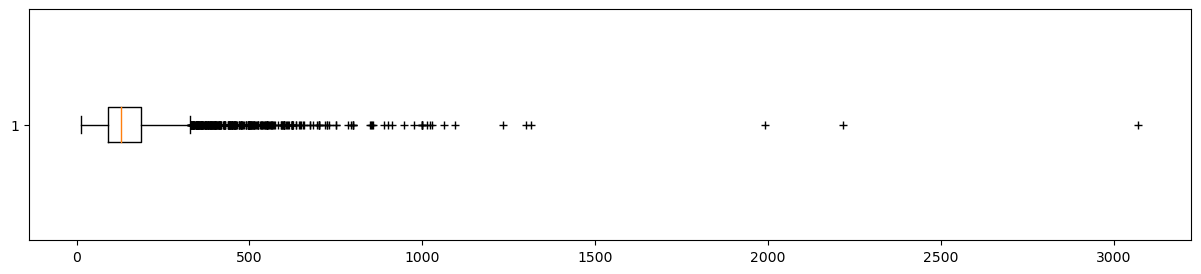

In [9]:
plt.figure(figsize=(15, 3))
plt.boxplot(df['price'], vert=False, sym='+')

In [10]:
df[df['price'] > 3000]

,accommodates,bedrooms,beds,bathrooms,rating,neighbourhood,room_type,bath_type,price
4034,15,6.0,7.0,3.5,4.5,Fremont,Entire home/apt,standard,3071.0


## Exploration of relations

* We next analyzed the possible relations between our selected features (both numerical and categorical features) and the price.
* As for numerical features ('accommodates', 'bedrooms', 'beds', 'bathrooms', 'rating'), though not so obvious, it seems that these features do have some relations to the price.
* However, it's hard to tell whether the price is influenced by the area of the house from the chart we have here.
* As for room and bath types, it seems that shared bedrooms or bathrooms are a little more inexpensive than the standard type.

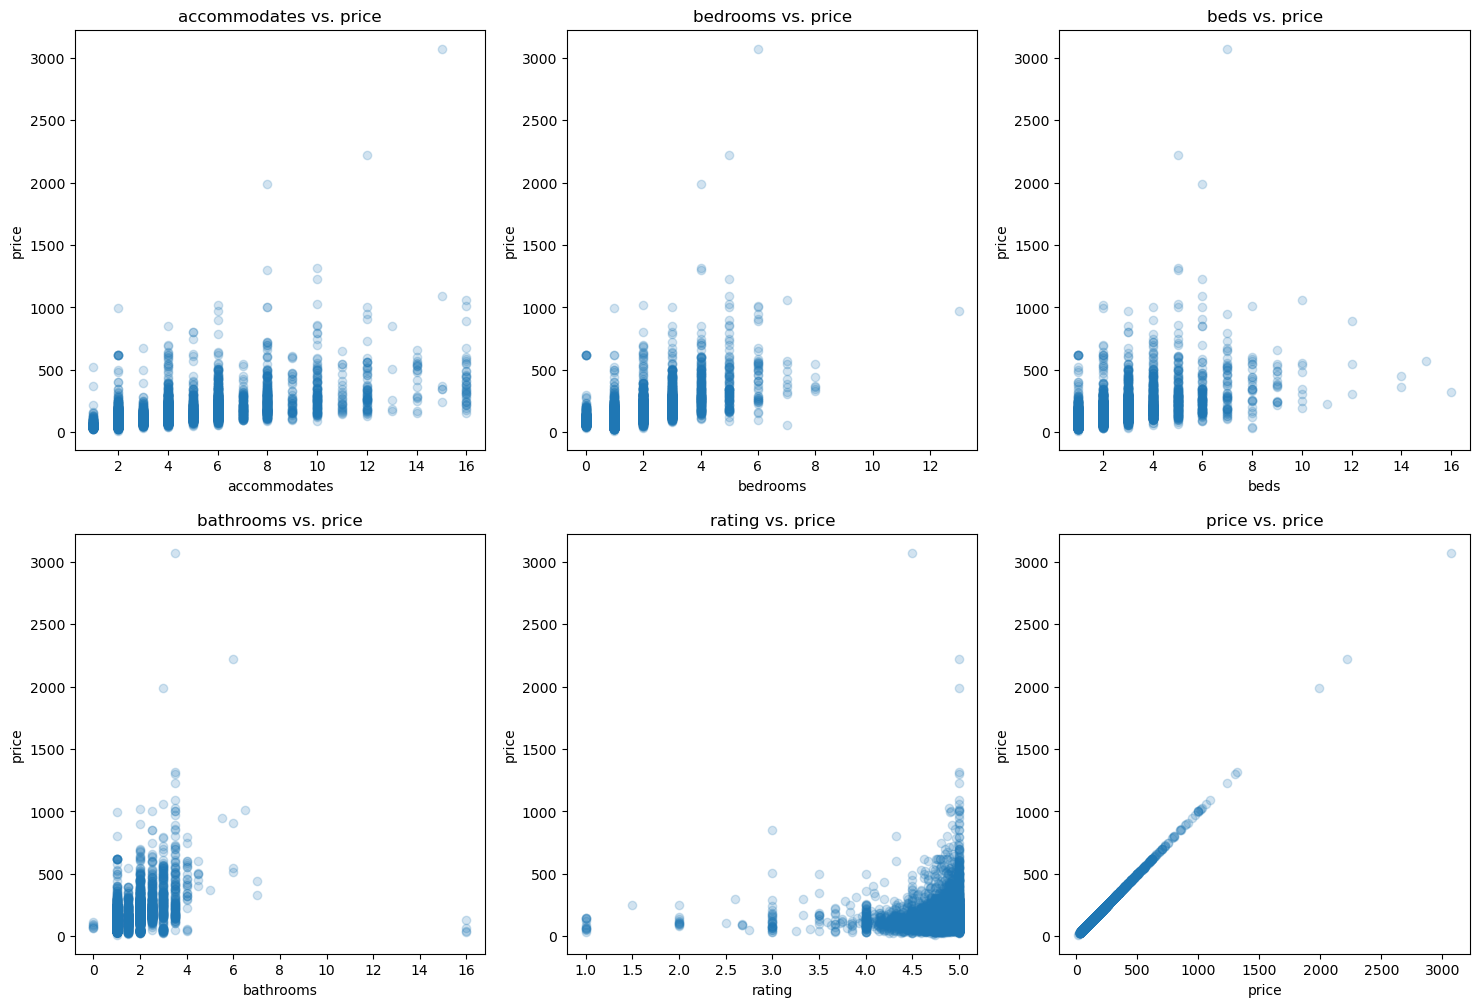

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for n in range(0, len(num_cols)):
    i, j = n//3, n%3
    axs[i, j].scatter(df[num_cols[n]], df['price'], alpha=0.2)
    axs[i, j].set_title(f'{num_cols[n]} vs. price')
    axs[i, j].set_xlabel(num_cols[n])
    axs[i, j].set_ylabel('price')

Text(0, 0.5, 'price')

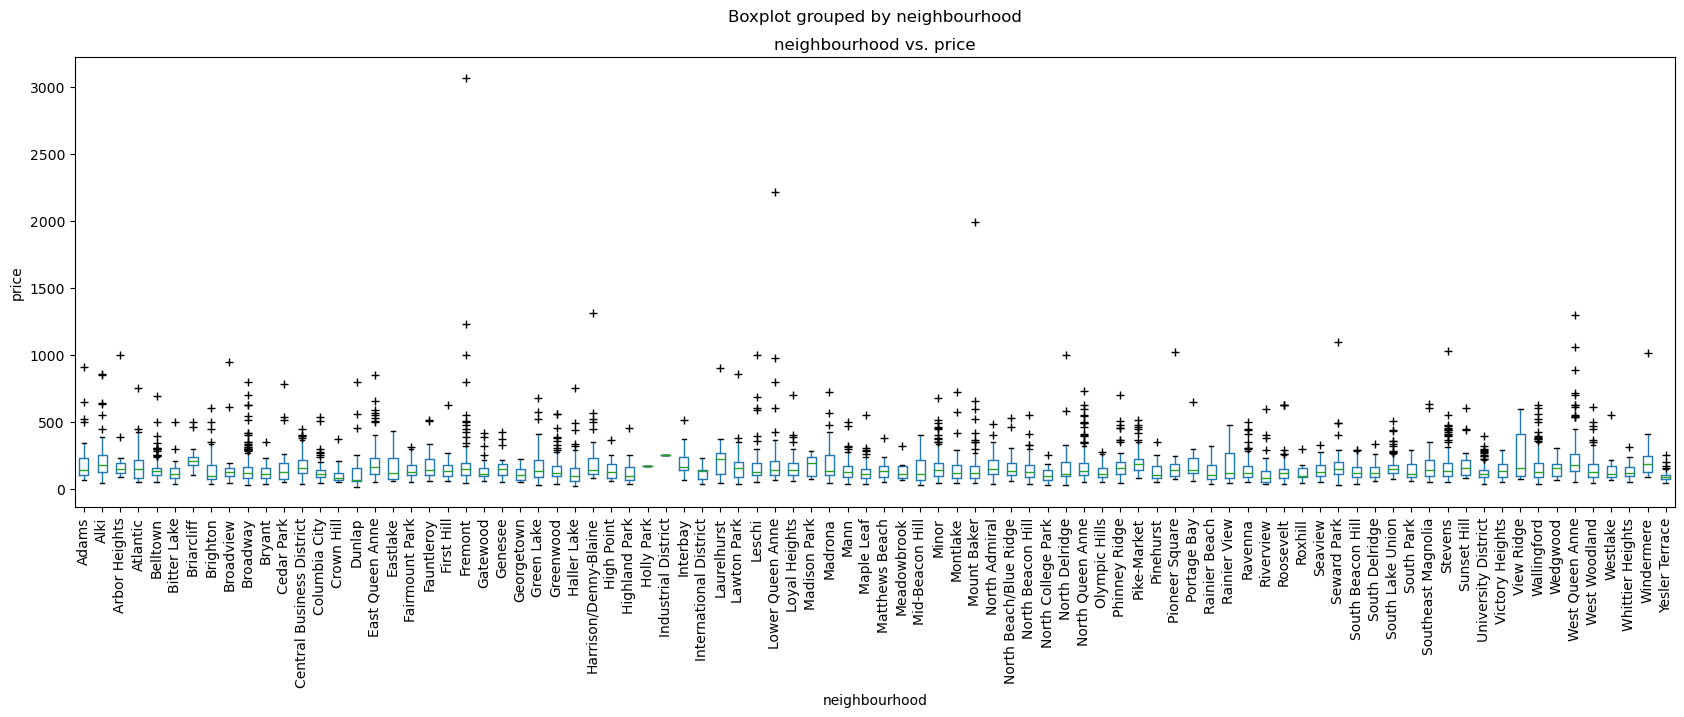

In [12]:
df.boxplot(column='price', by='neighbourhood', figsize=(20, 6), 
           sym='+', rot=90, grid=False)
plt.title('neighbourhood vs. price')
plt.xlabel('neighbourhood')
plt.ylabel('price')

Text(0, 0.5, 'price')

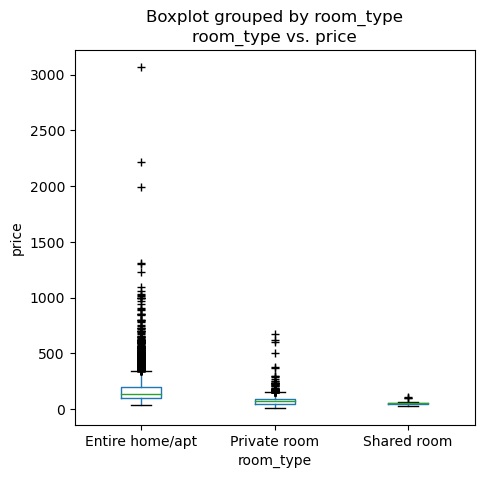

In [13]:
df.boxplot(column='price', by='room_type', figsize=(5, 5), 
           sym='+', grid=False)
plt.title('room_type vs. price')
plt.xlabel('room_type')
plt.ylabel('price')

Text(0, 0.5, 'price')

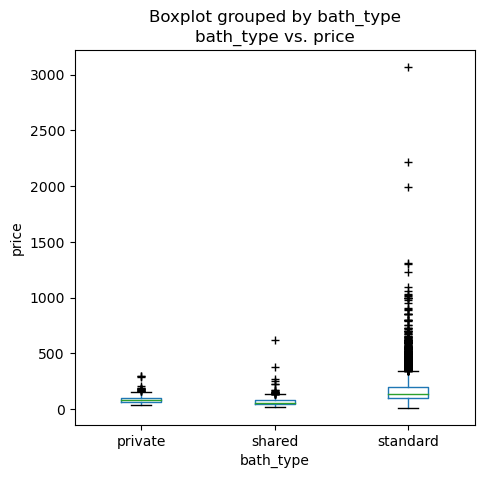

In [14]:
df.boxplot(column='price', by='bath_type', figsize=(5, 5), 
           sym='+', grid=False)
plt.title('bath_type vs. price')
plt.xlabel('bath_type')
plt.ylabel('price')